In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder

In [2]:
metadata = pd.read_csv('../data/metadata.csv')
train_labels = pd.read_csv('../data/train_labels.csv')

train_labels_and_metadata = train_labels.merge(
    metadata, how="left", left_on="uid", right_on="uid", validate="1:1"
)

In [3]:
metadata.head(5)

,uid,latitude,longitude,date,split
0,aabm,39.080319,-86.430867,2018-05-14,train
1,aabn,36.559700,-121.510000,2016-08-31,test
2,aacd,35.875083,-78.878434,2020-11-19,train
3,aaee,35.487000,-79.062133,2016-08-24,train
4,aaff,38.049471,-99.827001,2019-07-23,train


In [4]:
train_labels.head(5)

,uid,region,severity,density
0,aabm,midwest,1,585.0
1,aacd,south,1,290.0
2,aaee,south,1,1614.0
3,aaff,midwest,3,111825.0
4,aafl,midwest,4,2017313.0


In [5]:
train_labels_and_metadata.head(5)

,uid,region,severity,density,latitude,longitude,date,split
0,aabm,midwest,1,585.0,39.080319,-86.430867,2018-05-14,train
1,aacd,south,1,290.0,35.875083,-78.878434,2020-11-19,train
2,aaee,south,1,1614.0,35.487000,-79.062133,2016-08-24,train
3,aaff,midwest,3,111825.0,38.049471,-99.827001,2019-07-23,train
4,aafl,midwest,4,2017313.0,39.474744,-86.898353,2021-08-23,train


In [6]:
train_labels_and_metadata.size

136480

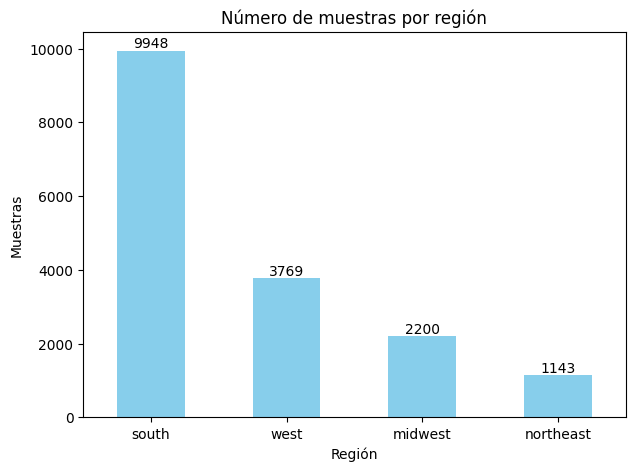

In [7]:
regiones = train_labels_and_metadata['region'].value_counts()

fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot()

regiones.plot(kind='bar', color='skyblue')

for i, v in enumerate(regiones):
    ax.text(i, v + 0.1, str(v), ha='center', va='bottom', color='black')

plt.title('Número de muestras por región')
plt.xlabel('Región')
plt.ylabel('Muestras')
plt.xticks(rotation=0)

plt.show()

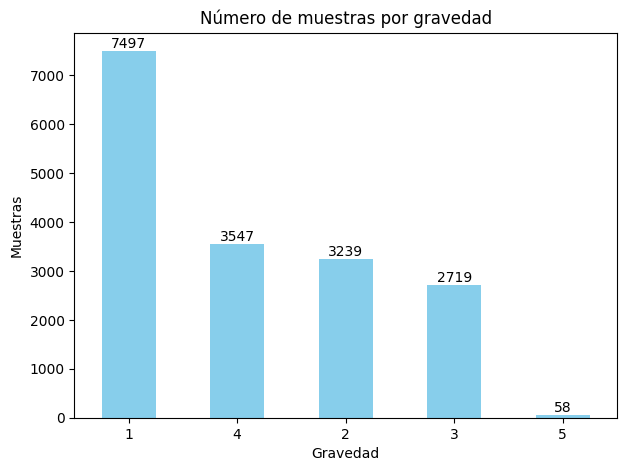

In [8]:
severities = train_labels_and_metadata['severity'].value_counts()

fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot()

severities.plot(kind='bar', color='skyblue')

for i, v in enumerate(severities):
    ax.text(i, v + 0.1, str(v), ha='center', va='bottom', color='black')

plt.title('Número de muestras por gravedad')
plt.xlabel('Gravedad')
plt.ylabel('Muestras')
plt.xticks(rotation=0)

plt.show()

<Axes: >

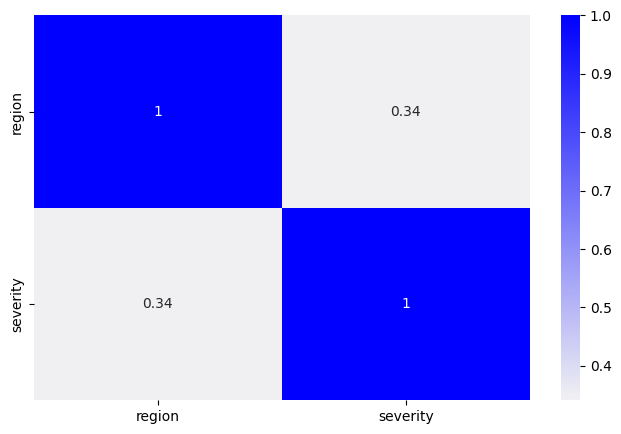

In [9]:
correlations = train_labels.drop(['uid', 'density'], axis=1)

encoder = OrdinalEncoder()
encoder.fit(correlations[['region']])

correlations['region'] = encoder.transform(correlations[['region']])

plt.figure(figsize=(8,5))
corr = correlations.corr()
cmap = sns.color_palette('light:b', as_cmap=True)
sns.heatmap(corr, annot=True, cmap=cmap)

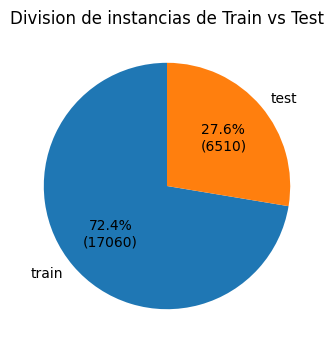

In [10]:
# Obtener los conteos de las divisiones
counts = metadata['split'].value_counts()

# Crear el gráfico de pastel
fig, ax = plt.subplots(figsize=(4, 4))
wedges, texts, autotexts = ax.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)

# Iterar sobre los textos y autotextos para mostrar el porcentaje y la cantidad
for text, autotext, count in zip(texts, autotexts, counts):
    percentage = autotext.get_text()
    count_str = f'({count})'
    autotext.set_text(f'{percentage}\n{count_str}')

plt.title('Division de instancias de Train vs Test')

# Mostrar el gráfico
plt.show()

In [11]:
metadata.shape

(23570, 5)